In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

401 - Unauthorized


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = 'inferred',
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)

)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = 'inferred',
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)

)

Found 5000 files belonging to 2 classes.


In [ ]:
# Normalization the pixel value between 0 to 1
def process(image, label):
  image = tf.cast(image/255 , tf.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), padding= "valid", activation = "relu",
                 input_shape = (256, 256, 3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2, 2),strides = 2, padding = "valid"))

model.add(Conv2D(32, kernel_size = (3, 3), padding= "valid", activation = "relu",))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2, 2),strides = 2, padding = "valid"))

model.add(Conv2D(32, kernel_size = (3, 3), padding= "valid", activation = "relu",))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2, 2),strides = 2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))

model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs = 15, validation_data = validation_ds)

Epoch 1/15
625/625 [==============================] - 59s 88ms/step - loss: 0.7834 - accuracy: 0.6159 - val_loss: 0.6328 - val_accuracy: 0.6484
Epoch 2/15
625/625 [==============================] - 54s 86ms/step - loss: 0.5311 - accuracy: 0.7330 - val_loss: 0.4834 - val_accuracy: 0.7726
Epoch 3/15
625/625 [==============================] - 55s 88ms/step - loss: 0.4422 - accuracy: 0.7941 - val_loss: 0.4685 - val_accuracy: 0.7818
Epoch 4/15
625/625 [==============================] - 55s 87ms/step - loss: 0.3817 - accuracy: 0.8253 - val_loss: 0.7037 - val_accuracy: 0.7400
Epoch 5/15
625/625 [==============================] - 54s 86ms/step - loss: 0.3094 - accuracy: 0.8622 - val_loss: 0.4806 - val_accuracy: 0.7988
Epoch 6/15
625/625 [==============================] - 54s 85ms/step - loss: 0.2395 - accuracy: 0.8964 - val_loss: 0.6248 - val_accuracy: 0.7904
Epoch 7/15
625/625 [==============================] - 58s 92ms/step - loss: 0.1747 - accuracy: 0.9262 - val_loss: 0.7877 - val_accuracy:

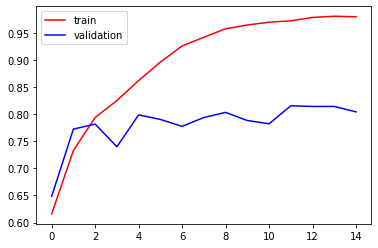

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()

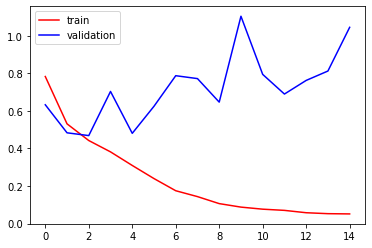

In [ ]:
plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()